In [1]:
#%matplotlib widget

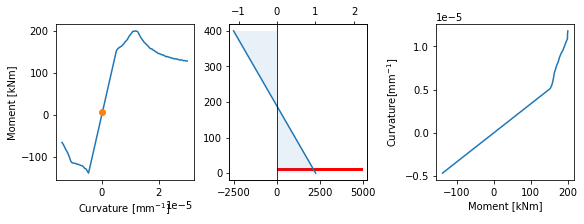

In [2]:
from bmcs_beam.bending.deflection_profile import DeflectionProfile
from bmcs_cross_section.mkappa.mkappa import MKappa
from bmcs_utils.api import InteractiveWindow
from bmcs_cross_section.cs_design.cs_shape import TShape
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()

mc = MKappa(low_kappa=-0.000014, high_kappa=0.00003)
dp = DeflectionProfile(mc=mc)

css = dp.mc.cross_section_shape
csl = dp.mc.cross_section_layout
csl.reinforcement.z_j = [10]
InteractiveWindow([dp.mc, mc.matrix, css, csl]).interact()

In [3]:
xdata = np.array([0,1,0.9, 0.8, 2])
ydata = np.array([0,1,2,3, 4])

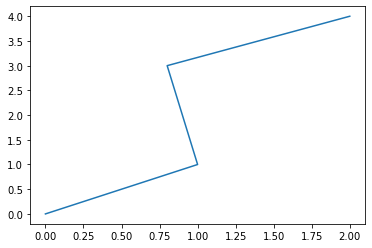

In [4]:
plt.plot(xdata, ydata)
plt.show()

In [5]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [6]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [7]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [8]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [9]:
i_x = np.argmin(diffs, axis=1)

In [10]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

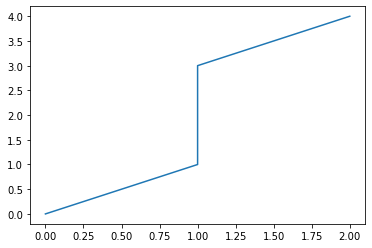

In [11]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [12]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [13]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [14]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [15]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [16]:
i_x = np.argmin(diffs, axis=1)

In [17]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

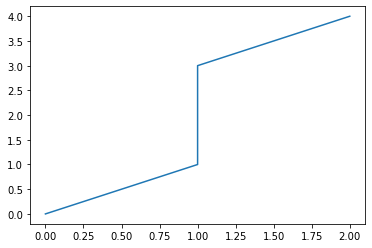

In [18]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [19]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [20]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [21]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [22]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [23]:
i_x = np.argmin(diffs, axis=1)

In [24]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

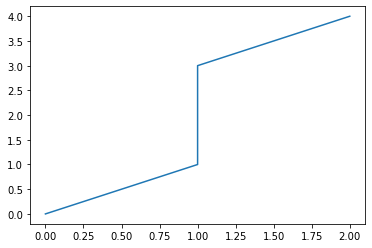

In [25]:
plt.plot(xdata[i_x], ydata)
plt.show()